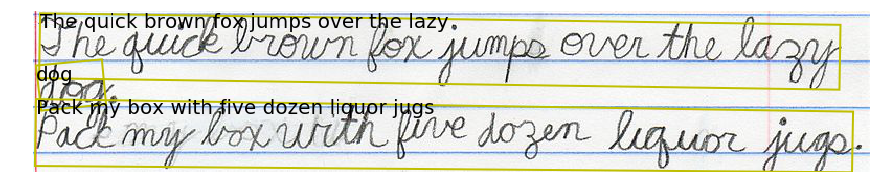

In [4]:
import requests
import time
# If you are using a Jupyter notebook, uncomment the following line.
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from PIL import Image
from io import BytesIO

# Replace <Subscription Key> with your valid subscription key.
subscription_key = "ba0090c81c12441a8a47066cba994dcf"
assert subscription_key

# You must use the same region in your REST call as you used to get your
# subscription keys. For example, if you got your subscription keys from
# westus, replace "westcentralus" in the URI below with "westus".
#
# Free trial subscription keys are generated in the westcentralus region.
# If you use a free trial subscription key, you shouldn't need to change
# this region.
vision_base_url = "https://westcentralus.api.cognitive.microsoft.com/vision/v2.0/"

text_recognition_url = vision_base_url + "recognizeText"

# Set image_url to the URL of an image that you want to analyze.
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Cursive_Writing_on_Notebook_paper.jpg/800px-Cursive_Writing_on_Notebook_paper.jpg"

headers = {'Ocp-Apim-Subscription-Key': subscription_key}
# Note: The request parameter changed for APIv2.
# For APIv1, it is 'handwriting': 'true'.
params  = {'mode': 'Handwritten'}
data    = {'url': image_url}
response = requests.post(
    text_recognition_url, headers=headers, params=params, json=data)
response.raise_for_status()

# Extracting handwritten text requires two API calls: One call to submit the
# image for processing, the other to retrieve the text found in the image.

# Holds the URI used to retrieve the recognized text.
operation_url = response.headers["Operation-Location"]

# The recognized text isn't immediately available, so poll to wait for completion.
analysis = {}
while "recognitionResult" not in analysis:
    response_final = requests.get(
        response.headers["Operation-Location"], headers=headers)
    analysis = response_final.json()
    time.sleep(1)

# Extract the recognized text, with bounding boxes.
polygons = [(line["boundingBox"], line["text"])
    for line in analysis["recognitionResult"]["lines"]]

# Display the image and overlay it with the extracted text.
plt.figure(figsize=(15, 15))
image = Image.open(BytesIO(requests.get(image_url).content))
ax = plt.imshow(image)
for polygon in polygons:
    vertices = [(polygon[0][i], polygon[0][i+1])
        for i in range(0, len(polygon[0]), 2)]
    text     = polygon[1]
    patch    = Polygon(vertices, closed=True, fill=False, linewidth=2, color='y')
    ax.axes.add_patch(patch)
    plt.text(vertices[0][0], vertices[0][1], text, fontsize=20, va="top")
_ = plt.axis("off")

In [5]:
polygons

[([2, 52, 65, 46, 69, 89, 7, 95], 'dog'),
 ([6, 2, 771, 13, 770, 75, 5, 64], 'The quick brown fox jumps over the lazy'),
 ([2, 84, 783, 96, 782, 154, 1, 148],
  'Pack my box with five dozen liquor jugs')]

In [6]:
print(polygons)

[([2, 52, 65, 46, 69, 89, 7, 95], 'dog'), ([6, 2, 771, 13, 770, 75, 5, 64], 'The quick brown fox jumps over the lazy'), ([2, 84, 783, 96, 782, 154, 1, 148], 'Pack my box with five dozen liquor jugs')]
